# Interpolating the population of China

We create two vectors for data about the population of China. The first has the years of census data, the other has the numbers of millions of people.

In [1]:
year = 1980:10:2010 
pop = [984.736, 1148.364, 1263.638, 1330.141];

It's convenient to measure time in years since 1980. We use `.-` to subtract a scalar from a vector elementwise.

In [2]:
t = year .- 1980
y = pop;

Now we have four data points $(t_1,y_1),\dots,(t_4,y_4)$, so $n=4$ and we seek an interpolating cubic polynomial. We construct the associated Vandermonde matrix:

In [3]:
V = [ t[i]^j for i=1:4, j=0:3 ]

4×4 Array{Int64,2}:
 1   0    0      0
 1  10  100   1000
 1  20  400   8000
 1  30  900  27000

To solve for the vector of polynomial coefficients, we use a backslash:

In [4]:
c = V \ y

4-element Array{Float64,1}:
 984.736
  18.766600000000025
  -0.23968500000000276
  -6.949999999993395e-5

The algorithms used by the backslash operator are the main topic of this chapter. For now, observe that the coefficients of the cubic polynomial vary over several orders of magnitude, which is typical in this context. By our definitions, these coefficients are given in ascending order of power in $t$. 


We can use the resulting polynomial to estimate the population of China in 2005:

In [5]:
using Polynomials
p = Polynomial(c)    # construct a polynomial
p(2005-1980)   # apply the 1980 time shift

1303.0119375

The official figure is 1297.8, so our result is not bad. 


We can visualize the interpolation process. First, we plot the data as points. We'll shift the $t$ variable back to actual years.

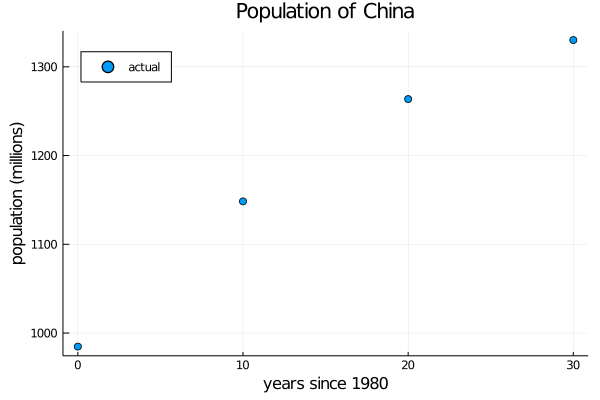

In [6]:
using Plots
scatter(t,y, label="actual", legend=:topleft,
    xlabel="years since 1980", ylabel="population (millions)", title="Population of China")

We want to superimpose a plot of the polynomial. We do that by evaluating it at a vector of points in the interval.  

In [7]:
tt = LinRange(0,30,500)   # 500 times from 0 to 30 years
yy = p.(tt)               # use dot to apply to all elements of the vector 

500-element Array{Float64,1}:
  984.736
  985.8633861620615
  986.9890395778162
  988.1129601566497
  989.2351478079472
  990.3556024410941
  991.4743239654758
  992.5913122904778
  993.7065673254856
  994.8200889798843
  995.9318771630594
  997.0419317843964
  998.1502527532807
    ⋮
 1327.2573255559355
 1327.5283639685024
 1327.797625414837
 1328.0651098043252
 1328.3308170463522
 1328.5947470503033
 1328.8568997255638
 1329.1172749815196
 1329.3758727275556
 1329.6326928730575
 1329.8877353274104
 1330.141

Now note the use of `plot!` to add to the current plot, rather than replacing it.

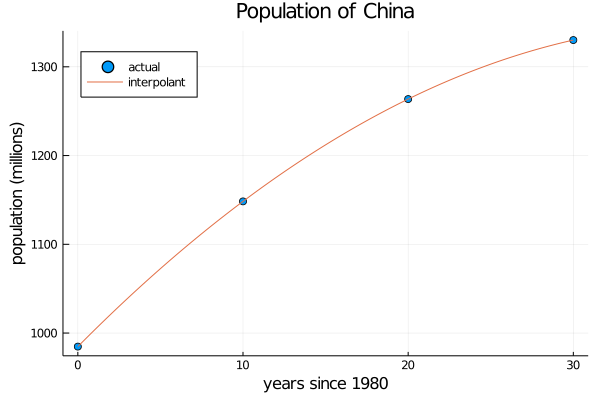

In [8]:
plot!(tt,yy, label="interpolant")

Let's redo it, this time continuing the curve outside of the original date range.

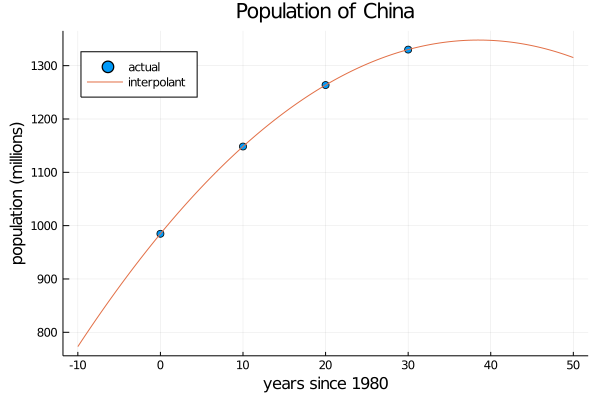

In [9]:
scatter(t,y, label="actual", legend=:topleft,
    xlabel="years since 1980", ylabel="population (millions)", title="Population of China")
tt = LinRange(-10,50,500)    
plot!(tt,p.(tt), label="interpolant")

While the interpolation is plausible, the extrapolation to the future is highly questionable! As a rule, extrapolation more than a short distance beyond the original interval is not reliable.